<a href="https://colab.research.google.com/github/MiltonGallardo/MiltonGallardo/blob/main/Ejercicio_Tuberias_Abulion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Tarea: Métricas de regresión
Ejercicio KNN (K-Nearest Neighbors) que completaste en la semana 5, ahora usando tuberías. Crea dos tuberías para unir el escalamiento y la regresión, y el escalamiento y la clasificación para las dos tareas principales:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# importar modelo de regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Para escalar datos
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df = pd.read_csv("/content/drive/MyDrive/ PTCienciaDeDatos/PandasParaManipulaciónDeDatos/abalone.csv")
df.head()



,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.shape

(4177, 9)

In [6]:
# obteniendo las columnas solicitadas en la tarea
df = df.loc[:, ['Sex', 'Length', 'Diameter','Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']]
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
# Mira la forma del marco de datos
df.shape

(4177, 9)

In [8]:
# Faltan valores en la columna y, que es lo que predeciremos.
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [9]:
# Elimine filas enteras del marco de datos si contienen nans o 'todos'
# this may not be the best strategy for our dataset
df = df.dropna(how = 'any')

In [10]:
# No hay más valores perdidos
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [11]:
df.shape

(4177, 9)

In [12]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [13]:
# Cambiar Sex a tipo numerico
def tran(y):
	    if y == "M":
	        return 1
	    elif y == "F":
	        return -1
	    else:
	        return 0

In [14]:
df.Sex = df.Sex.apply(tran)


In [15]:
df.shape

(4177, 9)

In [16]:
df.corr().sort_values(by = ['Sex'])

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627


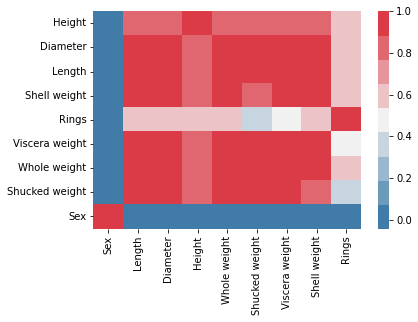

In [17]:
# Puede utilizar un mapa de calor para facilitar (en teoría) la lectura de la matriz de correlación
sns.heatmap(df.corr().sort_values(by = ['Sex']), cmap = sns.diverging_palette(240, 10, n=9))

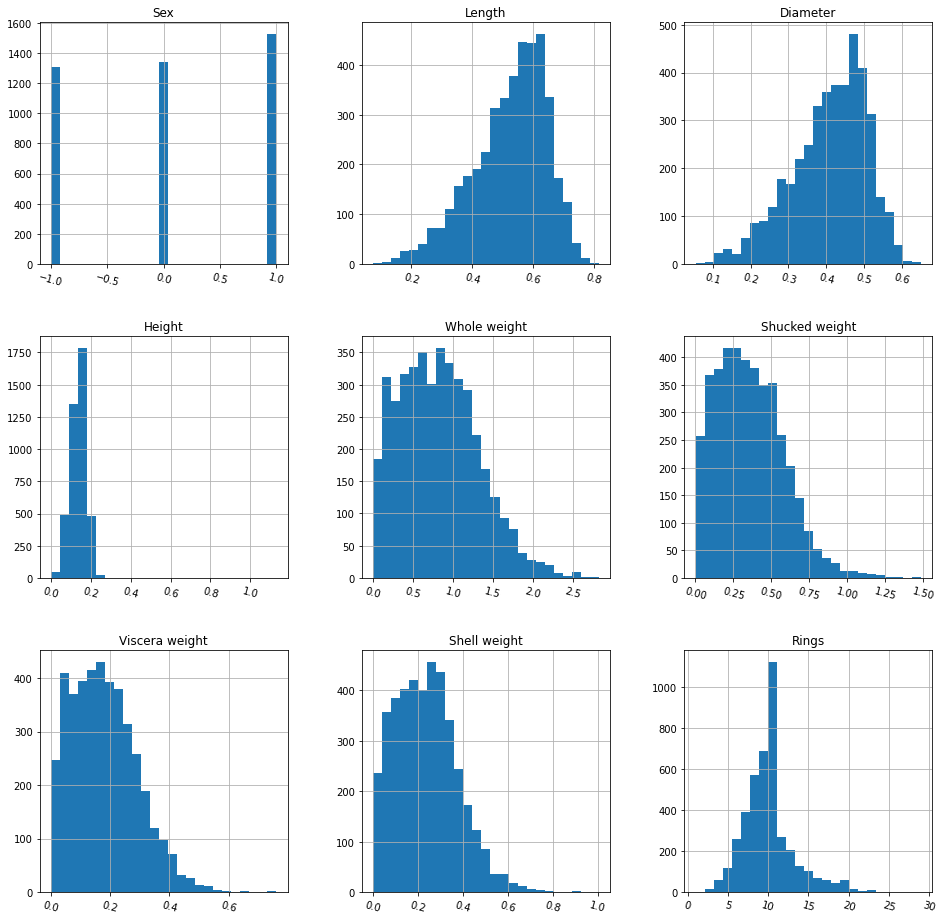

In [18]:
df.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);

In [19]:
priceFilter = df.loc[:, 'Sex'] < 0 
df = df.loc[~priceFilter, :]

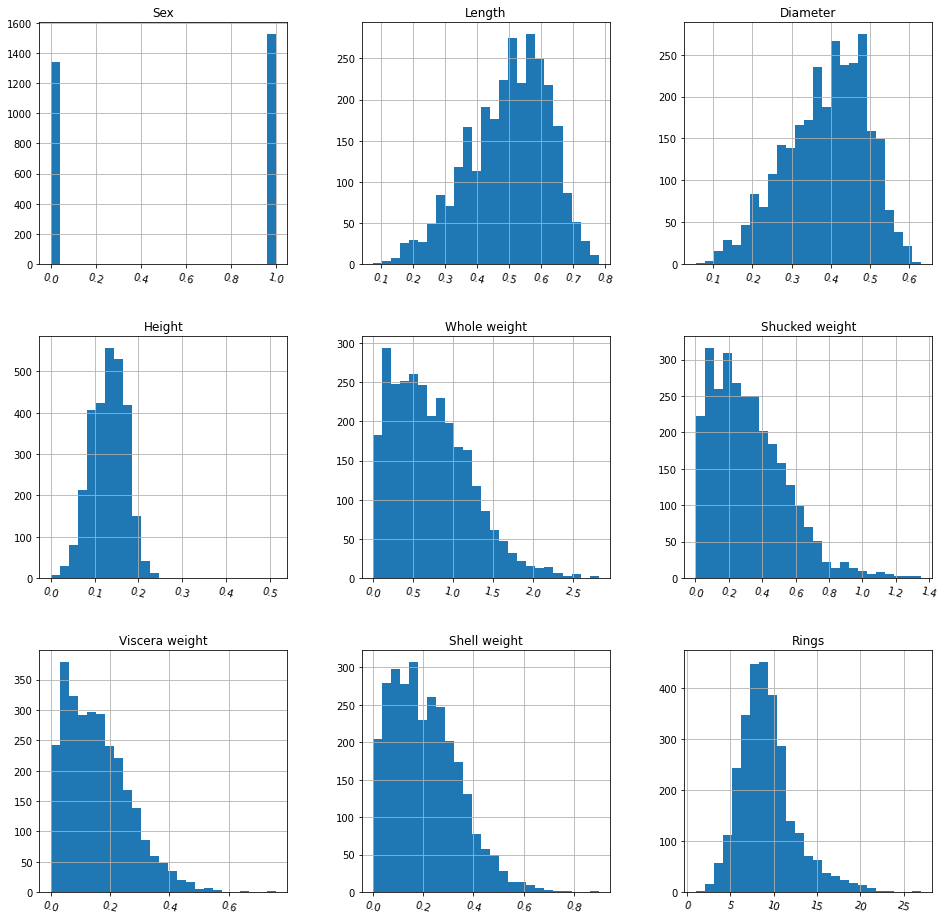

In [20]:
df.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);

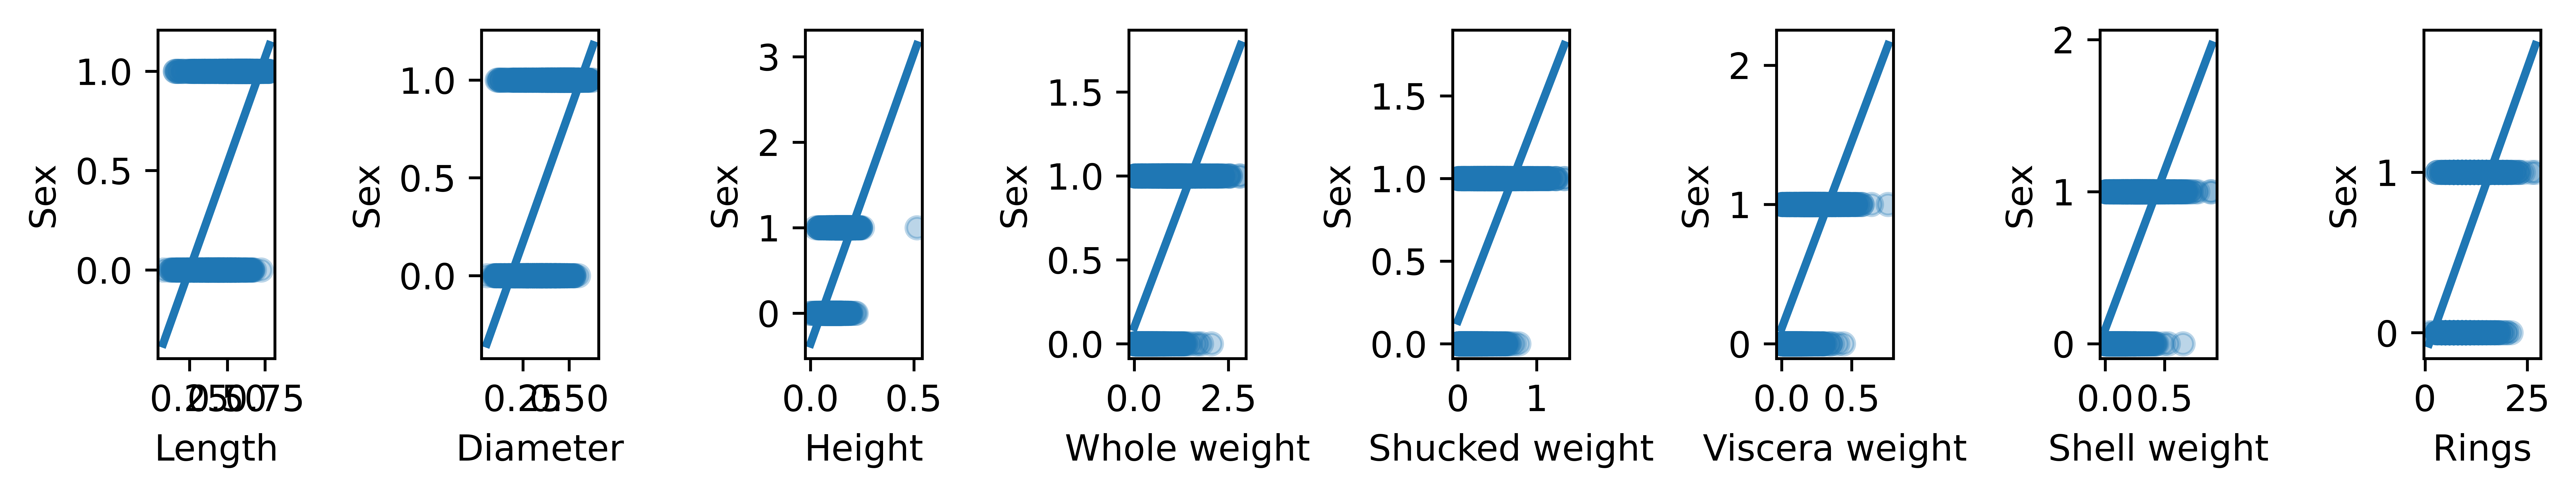

In [21]:
"""
You can use seaborn to see if you have linear relationships between each feature variable and the target
"""
fig, axes = plt.subplots(nrows = 1,ncols = 8,figsize = (10,2), dpi=1000)
sns.regplot(x='Length', y='Sex', data=df, ci=None, ax = axes[0], scatter_kws={'alpha':0.3});
sns.regplot(x='Diameter', y='Sex', data=df, ci=None, ax = axes[1], scatter_kws={'alpha':0.3});
sns.regplot(x='Height', y='Sex', data=df, ci=None, ax = axes[2], scatter_kws={'alpha':0.3});
sns.regplot(x='Whole weight', y='Sex', data=df, ci=None, ax = axes[3], scatter_kws={'alpha':0.3});
sns.regplot(x='Shucked weight', y='Sex', data=df, ci=None, ax = axes[4], scatter_kws={'alpha':0.3});
sns.regplot(x='Viscera weight', y='Sex', data=df, ci=None, ax = axes[5], scatter_kws={'alpha':0.3});
sns.regplot(x='Shell weight', y='Sex', data=df, ci=None, ax = axes[6], scatter_kws={'alpha':0.3});
sns.regplot(x='Rings', y='Sex', data=df, ci=None, ax = axes[7], scatter_kws={'alpha':0.3});
fig.tight_layout()



In [22]:
# matriz de características (debe ser una matriz NumPy)
# valores convierte el marco de datos en Num
X = df.loc[:, ['Sex', 'Length', 'Diameter','Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']].values

In [23]:
# Features Matrix needs to be at 2 dimensional
X.shape

(2870, 9)

In [24]:
# vector de destino
y = df.loc[:, 'Sex'].values

In [25]:
y.shape

(2870,)

In [27]:
# Regresi[on lineal]
# Hacer una instancia de regresión lineal
reg = LinearRegression(fit_intercept=True)

In [28]:
###### Reviso los datos y son 4177, por lo que voy a trabajar con reales hasta 2000 tanto X y Y
reg.fit(X[0:2000],y[0:2000])

LinearRegression()

In [29]:
# La entrada debe ser bidimensional (la remodelación hace que la entrada sea bidimensional)
reg.predict(X[0].reshape(-1,9))

array([1.])

In [30]:
reg.predict(X[0:10])

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 2.95535021e-15,
       3.09054095e-15, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 3.05323233e-15])

In [31]:
# Determinación de coeficiente r2
score = reg.score(X, y)
print(score)

1.0


In [32]:
#¿Cuál es la ecuación de la línea para la regresión?
reg.coef_

array([ 1.00000000e+00,  2.19530449e-15, -3.90487492e-15,  7.62857239e-15,
        3.00413139e-16, -1.54281518e-15,  4.79030416e-17,  1.42131140e-15,
       -7.08334947e-17])

In [33]:
reg.intercept_

3.1086244689504383e-15

In [34]:
m1 = reg.coef_[0]
m2 = reg.coef_[1]
m3 = reg.coef_[2]
b = reg.intercept_
# siguiendo la forma de intersección de pendiente
print("formula: y = {:.2f}*RM + {:.2f}*LSTAT + {:.2f}*'PTRATIO + {:.2f}".format(m1,m2,m3,b) )

formula: y = 1.00*RM + 0.00*LSTAT + -0.00*'PTRATIO + 0.00


In [35]:
# obteniendo las columnas solicitadas en la tarea
df = df.loc[:, ['Sex', 'Length', 'Diameter','Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']]
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [36]:
# Ahora voy a testear o entrenar 
reg.score(X[2000:],y[2000:])

1.0

In [ ]:
# Error absoluto medio (MAE)
reg.predict(X[2000:])



In [38]:
np.mean(np.abs(reg.predict(X[2000:])-(y[2000:])))

3.0395750257732593e-15

In [39]:
# Error cuadrático medio (MSE): 
np.mean((reg.predict(X[2000:])-(y[2000:]))**2)


9.276794248574698e-30

In [40]:
#Raíz del error cuadrático medio (MSE)
np.mean((reg.predict(X[310:])-(y[310:]))**2)**0.5

3.0514723603693966e-15

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [46]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


# Regresion Logistica

In [47]:
X = df.drop(columns = 'Sex')
# Codificar nuestro objetivo
y = df['Sex']

In [48]:
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [49]:
# Cree una tubería para escalado, PCA y regresión logística
pipe = make_pipeline(StandardScaler(), PCA(n_components = 3), LogisticRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=3)),
                ('logisticregression', LogisticRegression())])

In [50]:
print('Training accuracy:', pipe.score(X_train, y_train))
print('Testing accuracy:', pipe.score(X_test, y_test))

Training accuracy: 0.7927509293680297
Testing accuracy: 0.7841225626740947


#KNN

In [68]:
scaler = StandardScaler()
# Ajusta en X (asumiendo que tu matriz de características es una matriz NumPy)
scaler.fit(X)
# Transform X
X = scaler.transform(X);

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn = KNeighborsClassifier(n_neighbors=1)

In [72]:
# Mirando algunos hiperparámetros que parecen ajustables
print(knn)

KNeighborsClassifier(n_neighbors=1)


In [73]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [74]:
predictions = knn.predict(X_test)

In [75]:
predictions

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,

In [76]:
# calcular la precisión de la clasificación
score = knn.score(X_test, y_test)
score

0.7395543175487466

In [79]:
# Cree una tubería para escalado, PCA y  KNN
pipe = make_pipeline(StandardScaler(), PCA(n_components = 3), KNeighborsClassifier())
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=3)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [80]:
print('Training accuracy:', pipe.score(X_train, y_train))
print('Testing accuracy:', pipe.score(X_test, y_test))

Training accuracy: 0.8336431226765799
Testing accuracy: 0.7924791086350975


# Regresion Lineal

In [81]:
# Cree una tubería para escalado, PCA y  KNN
pipe = make_pipeline(StandardScaler(), PCA(n_components = 3), LinearRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=3)),
                ('linearregression', LinearRegression())])

In [82]:
print('Training accuracy:', pipe.score(X_train, y_train))
print('Testing accuracy:', pipe.score(X_test, y_test))

Training accuracy: 0.3543913793687866
Testing accuracy: 0.3412403043983411


#Conclusion
El metodo de clasificacion que genera mejor resultado es KNN con un accuracy del 79% porque kNN tiende a funcionar mejor en datasets pequeños y sin una cantidad enorme de caracteristicas.